In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

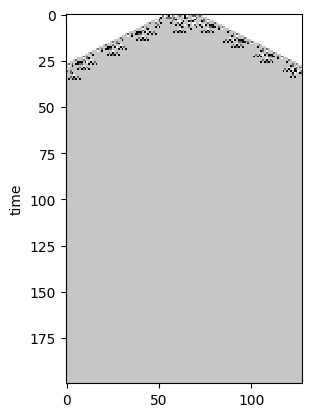

In [2]:
import cellpylib as cpl

rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=0.37, k=4, r=2,
                                                                   strong_quiescence=True, isotropic=True)

# cellular_automaton = cpl.init_simple(128, val=1)
cellular_automaton = cpl.init_random(128, k=4, n_randomized=20)

# evolve the cellular automaton for 200 time steps
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=200,
                                apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), r=2)

cpl.plot(cellular_automaton)


0.150390625
0.3701171875
0.75


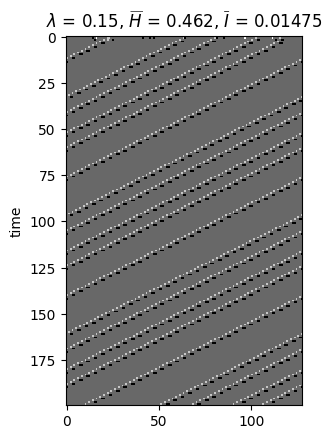

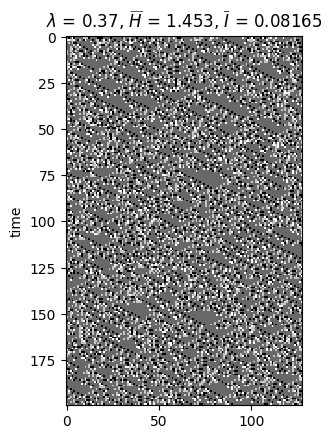

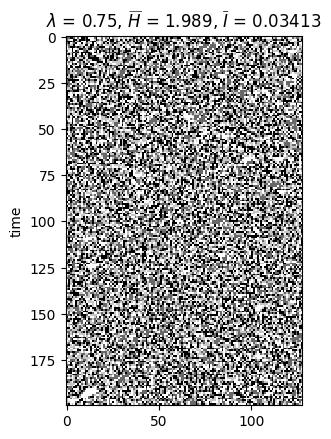

In [3]:
import cellpylib as cpl

rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=0.0, k=4, r=2,
                                                                   strong_quiescence=True, isotropic=True)

lambda_vals = [0.15, 0.37, 0.75]
ca_list = []
titles = []
for i in range(0, 3):
    # cellular_automaton = cpl.init_simple(128, val=1)
    cellular_automaton = cpl.init_random(128, k=4)

    rule_table, actual_lambda = cpl.table_walk_through(rule_table, lambda_vals[i], k=4, r=2,
                                                       quiescent_state=quiescent_state, strong_quiescence=True)
    print(actual_lambda)

    # evolve the cellular automaton for 200 time steps
    cellular_automaton = cpl.evolve(cellular_automaton, timesteps=200,
                                    apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), r=2)

    ca_list.append(cellular_automaton)
    avg_cell_entropy = cpl.average_cell_entropy(cellular_automaton)
    avg_mutual_information = cpl.average_mutual_information(cellular_automaton)
    titles.append(r'$\lambda$ = %s, $\widebar{H}$ = %s, $\widebar{I}$ = %s' %
                  (lambda_vals[i], "{:.4}".format(avg_cell_entropy), "{:.4}".format(avg_mutual_information)))

cpl.plot_multiple(ca_list, titles)


0, 0.9772489272165801, 0.9953784388202258, 0.6910235977348557
1, 0.7732771070871693, 0.7219280948873623, 0.2170201089931164
2, 0.8161820436418964, 0.6800770457282799, 0.21427469433126312
3, 0.8478402978900228, 0.6343095546405662, 0.21102425201689234
4, 0.8403698559835311, 0.584238811642856, 0.20713111245994986
5, 0.859706669358982, 0.5293608652873644, 0.2023836868328603
6, 0.8336287039188367, 0.4689955935892812, 0.19643170246842095
7, 0.8341837448282469, 0.4021791902022729, 0.18862822616134206
8, 0.7959534816326952, 0.32744491915447627, 0.17754241927300699
9, 0.7967310045710508, 0.24229218908241482, 0.15852698704162585
10, 0.6864460108695626, 0.14144054254182067, 0.09919292448828046
11, 0.8036086064543545, 0.24229218908241482, 0.15852698704162585
12, 0.8349918134454282, 0.32744491915447627, 0.17754241927300712
13, 0.8647790138137301, 0.4021791902022729, 0.188628226161342
14, 0.8457563589491337, 0.4689955935892812, 0.1964317024684209
15, 0.8682704921596553, 0.5293608652873644, 0.2023836

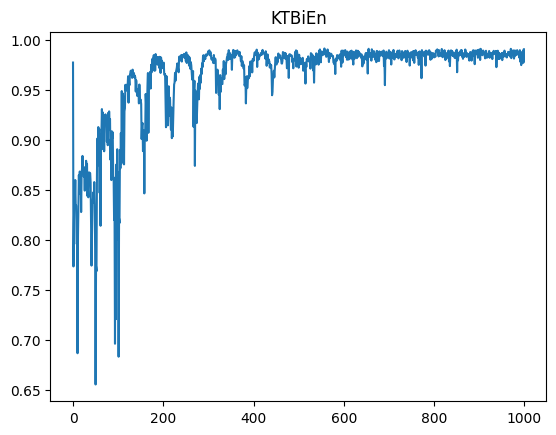

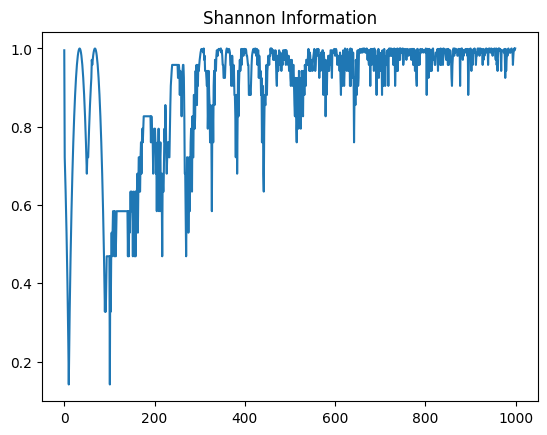

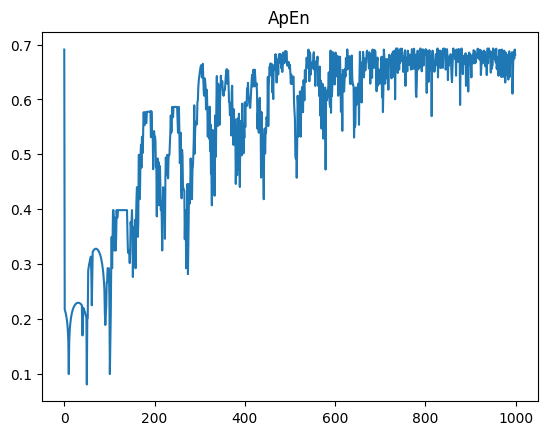

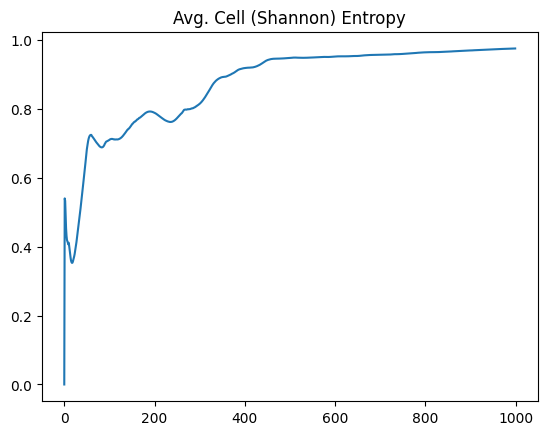

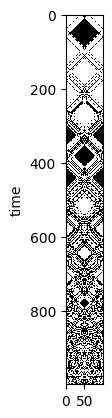

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import cellpylib as cpl

# NKS page 442 - Rule 122R
cellular_automaton = np.array([[0]*40 + [1]*20 + [0]*40])
rule = cpl.ReversibleRule(cellular_automaton[0], 122)
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=1000, apply_rule=rule)

timestep = []
bientropies = []
shannon_entropies = []
average_cell_entropies = []
apentropies = []
for i, c in enumerate(cellular_automaton):
    timestep.append(i)
    bit_string = ''.join([str(x) for x in c])
    bientropies.append(cpl.ktbien(bit_string))
    shannon_entropies.append(cpl.shannon_entropy(bit_string))
    average_cell_entropies.append(cpl.average_cell_entropy(cellular_automaton[:i+1]))
    apentropies.append(cpl.apen(bit_string, m=1, r=0))
    print("%s, %s, %s, %s" % (i, bientropies[-1], shannon_entropies[-1], apentropies[-1]))

plt.figure(1)
plt.title("KTBiEn")
plt.plot(timestep, bientropies)

plt.figure(2)
plt.title("Shannon Information")
plt.plot(timestep, shannon_entropies)

plt.figure(3)
plt.title("ApEn")
plt.plot(timestep, apentropies)

plt.figure(4)
plt.title("Avg. Cell (Shannon) Entropy")
plt.plot(timestep, average_cell_entropies)

plt.figure(5)
cpl.plot(cellular_automaton)